#**Aula 2 - Construindo um perceptron**

##**Obtendo pesos e viés**

Importando a biblioteca TensorFlow e definindo uma semente aleatória com o valor 31 para garantir a reprodutibilidade dos resultados:
> Também obtemos e exibimos a versão do TensorFlow instalada, o que é útil para garantir compatibilidade em diferentes ambientes de desenvolvimento

In [ ]:
import tensorflow as tf

tf.random.set_seed(31)
versao_tensorflow = tf.__version__
print(f'TensorFlow instalado na versão: {versao_tensorflow}')

TensorFlow instalado na versão: 2.15.0


 Inicializando duas variáveis utilizando TensorFlow:
 * A variável `peso` é criada com valores aleatórios normalmente distribuídos de dimensão 1, representando os pesos de um modelo.
 * Similarmente, a variável `vies` também é inicializada com valores aleatórios normalmente distribuídos de dimensão 1, atuando como o viés do modelo.

 > Estas variáveis são essenciais na construção de modelos de aprendizado de máquina, permitindo que o modelo ajuste esses parâmetros durante o treinamento para minimizar o erro de previsão.

In [ ]:
peso = tf.Variable(tf.random.normal([1]), name='peso')
vies = tf.Variable(tf.random.normal([1]), name='vies')

Checando os valores de peso e viés obtidos:

In [ ]:
peso

<tf.Variable 'peso:0' shape=(1,) dtype=float32, numpy=array([-0.3594139], dtype=float32)>

In [ ]:
vies

<tf.Variable 'vies:0' shape=(1,) dtype=float32, numpy=array([0.15100643], dtype=float32)>

Exibindo os valores das duas variáveis, `peso` e `vies`, utilizando a função `print`. Para acessar os valores armazenados nessas variáveis, que estão no formato de tensores do TensorFlow, utilizamos o método `.numpy()` para convertê-los em arrays Numpy. Assim, é possível visualizar de forma clara os valores numéricos atuais dessas variáveis:

In [ ]:
print(f'Peso = {peso.numpy()}')
print(f'Vies = {vies.numpy()}')

Peso = [-0.3594139]
Vies = [0.15100643]


##**Construindo um perceptron**

Definindo uma função chamada `neuronio` que simula o funcionamento básico de um neurônio artificial em redes neurais.

A função recebe uma entrada `x` e calcula a saída `z`, multiplicando a entrada pelo `peso` e adicionando um `vies`. Essa operação é realizada usando as funções `tf.multiply` para a multiplicação e `tf.add` para a soma do viés:

In [ ]:
def neuronio(x):
  z = tf.add(tf.multiply(x, peso), vies)
  return z

Testando o perceptron com um valor de entrada igual a 10.
A função `tf.constant` é usada para definir um valor imutável, neste caso, o número 10:

In [ ]:
# exemplo = tf.constant(10)

In [ ]:
# neuronio(exemplo)

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:Mul] name: 

O erro ocorre porque você estamos tentando realizar uma operação de multiplicação entre um valor inteiro e valores do tipo float.

> No TensorFlow, os tipos de dados dos tensores precisam ser compatíveis nas operações que você executa.

Passando o valor 10 como número float:

In [ ]:
exemplo = tf.constant(10.0)

In [ ]:
neuronio(exemplo)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-3.4431324], dtype=float32)>

Como resultado temos um valor negativo!

Surge então a questão de como lidar com esse valor, buscando uma escala compreendida entre 0 e 1, em vez da faixa ilimitada entre -infinito e +infinito.

Analisando a função seno para transformação de valores:



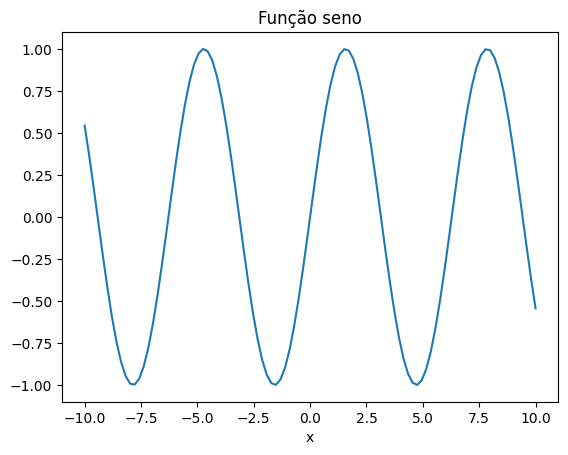

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gera_grafico():
  x = np.linspace(-10, 10, 100)
  y = tf.sin(x)

  plt.plot(x,y)
  plt.xlabel('x')
  plt.title('Função seno')
  plt.show()

gera_grafico()

Analisando a função Sigmóide para transformação de valores:

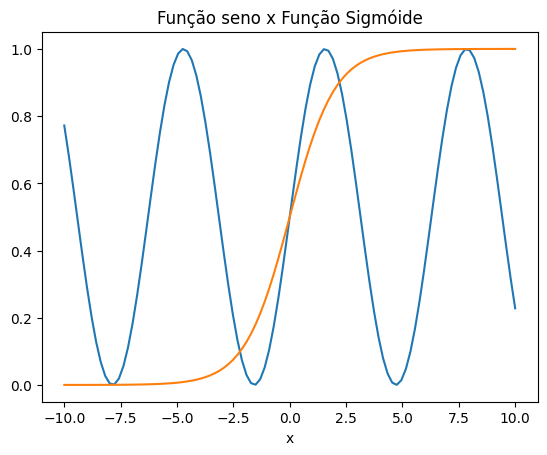

In [ ]:
def gera_grafico():
  x = np.linspace(-10, 10, 100)
  y = (tf.sin(x) + 1)/2
  y2 = tf.sigmoid(x)

  plt.plot(x,y)
  plt.plot(x, y2)
  plt.xlabel('x')
  plt.title('Função seno x Função Sigmóide')
  plt.show()

gera_grafico()

A função Sigmóide é uma ferramenta fundamental em Machine Learning, especialmente em problemas de classificação, devido à sua capacidade de converter valores numéricos variáveis em probabilidades que estão no intervalo de 0 a 1. Essa característica a torna ideal para problemas de classificação binária, onde o objetivo é prever a probabilidade de uma instância pertencer a uma de duas classes possíveis.

##**Obtendo probabilidades**

Utilizando a biblioteca TensorFlow para calcular a probabilidade de uma saída específica de um neurônio. Primeiramente, um tensor constante com o valor [10.0] é passado como entrada para a função neuronio, representando os dados de entrada. Em seguida, a função `tf.sigmoid` é aplicada ao resultado para obter a probabilidade, utilizando a função de ativação sigmoidal, que mapeia a saída do neurônio para um intervalo entre 0 e 1, representando a probabilidade:

In [ ]:
probabilidade = tf.sigmoid(neuronio(tf.constant([10.0])))
probabilidade

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.03097433], dtype=float32)>

Verificando se a variável `probabilidade` possui um valor maior do que 0.5. Esse tipo de comparação é comumente utilizado para avaliar resultados em contextos onde há uma probabilidade de sucesso ou falha, sendo o valor de 0.5 frequentemente considerado o limiar entre esses dois resultados. A expressão retorna um valor booleano: *True* se a condição for atendida (ou seja, se a probabilidade for maior que 50%) e *False* caso contrário:

In [ ]:
probabilidade > 0.5

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([False])>

Calculando a probabilidade com os dados do DataFrame de doenças cardíacas. Os dados são carregados, definimos o `X`, como foi feito na aula seguinte, e começamos obtendo a probabilidade apenas da coluna `chol` (colesterol):

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
doenca_cardiaca = fetch_ucirepo(id=45)

X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

In [ ]:
probabilidade = tf.sigmoid(neuronio(tf.constant(X['chol'], dtype=tf.float32)))

Analisando as probabilidades maiores que 0.5 nos 10 primeiros pacientes:

In [ ]:
(probabilidade > 0.5)[:10]

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False])>

##**Obtendo a perda**

Para obter uma nota e julgar como nosso estimador está performando, precisamos comparar essas probabilidades obtidas com os valores reais do nosso target.

Começamos criando uma constante com o target:

In [ ]:
target = doenca_cardiaca.data.targets
target = (target > 0) * 1

In [ ]:
y = tf.constant(target, dtype=tf.float32)
y[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

Inicializando uma calculadora de perda usando a função de perda de entropia cruzada binária, que é comumente utilizada em problemas de classificação binária. A função `calculadora_perda` é então aplicada para calcular a perda entre os valores reais `y` e as probabilidades preditas em `probabilidade`. O resultado, perda, representa o quão bem o modelo está performando, com valores menores indicando melhor desempenho:

In [ ]:
calculadora_perda = tf.keras.losses.BinaryCrossentropy()
perda = calculadora_perda(y_true=y, y_pred=probabilidade)
perda

<tf.Tensor: shape=(), dtype=float32, numpy=7.076132>

Calculando a acurácia do modelo, comparando as previsões `(probabilidade.numpy() > 0.5)` com os valores verdadeiros `(y.numpy())`. A expressão `(probabilidade.numpy() > 0.5) * 1` converte probabilidades em previsões binárias (0 ou 1), e `np.mean` calcula a média dessas comparações, resultando na proporção de previsões corretas:

In [ ]:
np.mean(y.numpy() == ((probabilidade.numpy() > 0.5) * 1))

0.5412541254125413